In [1]:
import pandas as pd
import ast
import warnings
import re
from konlpy.tag import *
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'HYGothic-Medium'

warnings.filterwarnings('ignore')

In [2]:
before_camping = pd.read_excel("data/코로나이전_차박캠핑.xlsx")

In [3]:
before_camping.head()

,url,date,title,hashtags,contents
0,https://blog.naver.com/hd979796?Redirect=Log&l...,2017.01.25.,[레이 차박캠핑] 에어박스 에어매트 사용 후기.,"['#차박캠핑', '#레이차박', '#에어매트', '#에어박스에어매트', '#에어매...",['겨울이지만 따듯한 날씨에 다녀왔던 차박캠핑. 첫 차박캠핑이여서 집근처 남양주로 ...
1,https://blog.naver.com/so9122?Redirect=Log&log...,2017.04.11.,차박캠핑 차박타프로 어울리는 면타프 캠핑트리 '휴',"['#차박캠핑', '#면타프', '#차박', '#차박타프']","['', '차박캠핑..말 그대로 텐트대신 차에서생활하는 캠핑 입니다.전 아이들이 있..."
2,https://blog.hi.co.kr/1983?category=552066,2018.07.27.,차박 캠핑으로 이색 바캉스 도전하기!,[],[]
3,https://blog.naver.com/eunjun2009?Redirect=Log...,2017.09.28.,그랜드카니발 차박캠핑 아베나키 슬림 에어매트 만 있으면 끝,[],"['', '그랜드카니발 차박캠핑\xa0 아베나키 슬림 에어매트 있으면 끝차박을 할려..."
4,https://blog.naver.com/igosooya?Redirect=Log&l...,2017.03.19.,차박캠핑 테스트 완료 with 갤로퍼2,"['#갤로퍼', '#갤로퍼차박', '#차박', '#차박캠핑']",['마침내 완성된 갤로퍼2의차박 솔루션무시동히터 + 2열 도그가드 + 3열 드로워'...


# 데이터 전처리

- hashtags랑 contents 데이터 리스트로 변환
- hashtags랑 contents 데이터 둘 다 없을 경우 => 행삭제

In [4]:
before_camping["hashtags"] = before_camping["hashtags"].apply(ast.literal_eval)
before_camping["contents"] = before_camping["contents"].apply(ast.literal_eval)

In [5]:
before_camping = before_camping[(before_camping["hashtags"].str.len() != 0) | (before_camping["contents"].str.len() != 0)]

In [6]:
len(before_camping)

1962

- hashtags랑 contents 데이터 합치기

In [7]:
before_camping["info"] = before_camping["hashtags"] + before_camping["contents"]

- info : 본문 내용과 관련없는 특수문자 제거, 명사 추출

In [8]:
before_camping["info"] = before_camping["info"].map(lambda x: ' '.join(x))

In [9]:
before_camping["info"] = before_camping["info"].map(lambda x: re.compile(r'[^ A-Za-z0-9가-힣+]').sub('', x))

In [10]:
okt = Okt()
before_camping["info"] = before_camping["info"].map(lambda x: okt.nouns(x))

In [11]:
before_camping["info"]

0       [차박캠핑, 레이, 차박, 에어, 매트, 에어, 박스, 에어, 매트, 에어, 매트,...
1       [차박캠핑, 면타프, 차박, 차박타프, 차박캠핑, 말, 그대로, 텐트, 대신, 차,...
3       [그랜드, 카니발, 차박캠핑, 아베, 키, 슬림, 에어, 매트, 끝차박, 려, 건,...
4       [갤로퍼, 갤로퍼, 차박, 차박, 차박캠핑, 마침내, 완성, 갤로퍼, 의차박, 솔루...
5       [결혼, 얼마, 안, 캠핑, 장비, 마구잡이, 코선, 막상, 몇, 번, 최, 하루,...
                              ...                        
1995    [차박캠핑, 차박, 차박, 팰리세이드, 스트라, 국내여행지, 대천해수욕장, 대천항,...
1996    [카라반, 박람회, 코엑스, 캠핑카, 킨텍스, 캠핑카, 박람회, 트럭, 캠핑카, 르...
1997    [차박캠핑, 차박, 속초, 차박, 속초, 차박, 장소, 속초, 등대, 아바이, 마을...
1998    [마지기, 주소, 강원도, 여행, 평창, 여행, 평창, 차박캠핑, 차박, 차박캠핑,...
1999    [국내, 여행, 캠핑, 차박, 양평, 캠핑, 중미산, 자연휴양림, 중미산, 캠핑, ...
Name: info, Length: 1962, dtype: object

# WordCloud

In [12]:
word_tokens = list(before_camping["info"])
word_tokens = sum(word_tokens, [])

In [13]:
stop_words = []

f = open("data/stopwords-ko.txt", encoding = "utf-8")
for data in f:
    stop_words.append(data.rstrip('\n'))
    
f.close()

In [14]:
total_words = []

for w in word_tokens:
    if w not in stop_words:
        total_words.append(w)

result_words = ' '.join(total_words)

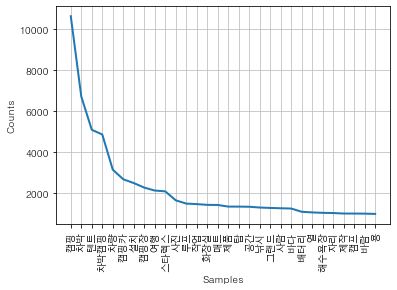

In [15]:
from nltk import Text

num_words = Text(total_words)
num_words.plot(30)
plt.show()

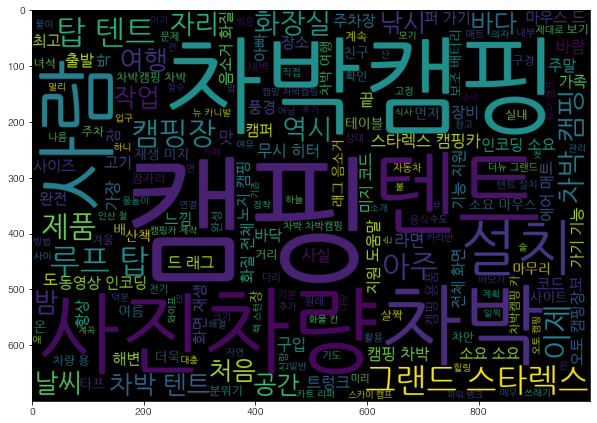

In [16]:
from wordcloud import WordCloud
font_path = 'NanumGothic.ttf'
wcloud = WordCloud(font_path = font_path, width = 1000, height = 700).generate(result_words)

plt.figure(figsize = (10,10))
plt.imshow(wcloud)
wcloud.to_file('차박캠핑_코로나전.png')

# Word2vec

In [17]:
def korean_stop_words(x, stop_words):
    result_words = [word for word in x if not word in stop_words]
    return result_words

dataset = before_camping["info"].apply(lambda x: korean_stop_words(x, stop_words))

In [18]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(dataset, sg = 1, window = 10, min_count = 1)
model.init_sims(replace=True)

In [19]:
print("차박캠핑와 차박의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("차박캠핑", "차박")))

차박캠핑와 차박의 단어간 유사도는 0.70 입니다.


In [20]:
print("차박캠핑와 힐링여행의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("차박캠핑", "힐링여행")))

차박캠핑와 힐링여행의 단어간 유사도는 0.66 입니다.
